# `KNeighborClassifier` 파라미터
- `n_neighbor` : 분류 시 고려할 인접 샘플 수 (가장 가까운 이웃을 몇 개를 고를지에 대한 파라미터)
  - `default=5`
- `weights : `distance` - 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
  - `default=uniform`
- `metric` : 거리 계산의 척도(`minkowski`, `euclidean`, `manhattan` 등)
  - `default='minkowski'`, `p`라는 매개 변수를 추가 사용 / `p=1`이면 `manhattan`, `p=2`이면 `euclidean`과 동일
  - ex : `KNeighborClassifier(n_neighbors=11, p=2, metric='minkowski')` `p=2`가 기본 값
- `n_jobs` : 사용할 코어의 개수, -1이면 전부 사용

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [48]:
dataset = load_iris()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state=42)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


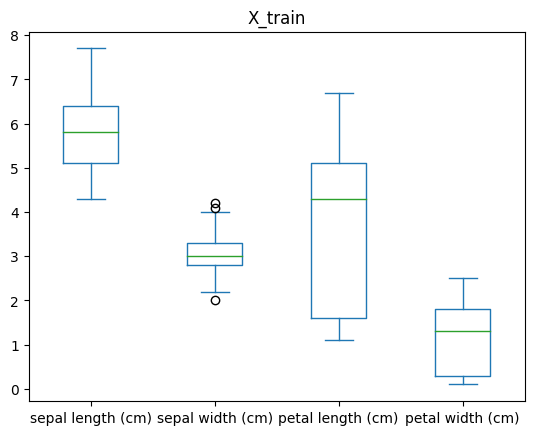

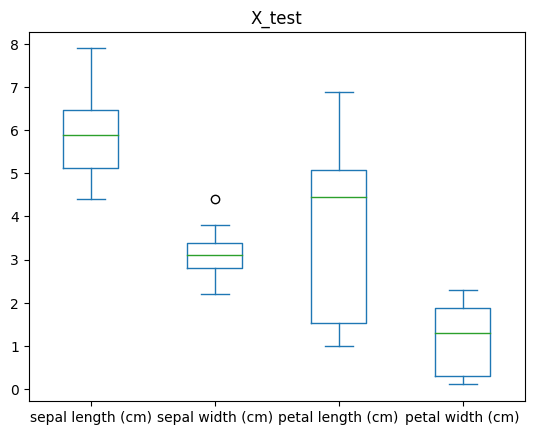

In [49]:
# pandas의 시각화 기능으로 박스 플롯을 그려 스케일 확인
import matplotlib.pyplot as plt

X_train.plot(kind="box")

plt.title("X_train")
plt.show()

X_test.plot(kind="box")

plt.title("X_test")
plt.show()

In [50]:
# 학습데이터 전처리 전처리(scale)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

print("X_train_scaled : \n", X_train_scaled)
print("X_test_scaled : \n", X_test_scaled)

X_train_scaled : 
 [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125 

In [51]:
# 모델 생성및 학습
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# 모델 예측및 평가

from sklearn.metrics import accuracy_score

pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9736842105263158

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

estimator = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=42, shuffle=True)

parameters = {
  'n_neighbors' : list(range(1,100)),
  'weights' : ["uniform", "distance"],
  'metric' : ['euclidean', 'manhattan', 'minkowski'],
  # 'p' : [1, 2]
  }

model = GridSearchCV(
  estimator=estimator,
  param_grid=parameters,
  cv=cv,
  verbose=-1,
  n_jobs=-1,
  refit=True
)

model.fit(X_train, y_train)

print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", model.best_score_);print()

Best Estimator:
 KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Best Params:
 {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Best Score:
 0.9636363636363635



# 농구선수 포지션 예측

In [53]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 그래프 출력을 위해 선언합니다.
%matplotlib inline
# sklearn 모델의 동일핚 결과 출력을 위해 선언합니다.
np.random.seed(5)

train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [54]:
train

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8
...,...,...,...,...,...
75,Victor Oladipo,SG,1.9,4.3,0.3
76,Willie Cauley-Stein,C,0.0,4.5,0.6
77,Brook Lopez,C,1.8,5.4,1.7
78,Josh Richardson,SG,1.4,3.2,0.7


In [55]:
test

,Player,Pos,3P,TRB,BLK
0,JaVale McGee,C,0.0,3.2,0.9
1,Manu Ginobili,SG,1.3,2.3,0.2
2,Nene Hilario,C,0.0,4.2,0.6
3,Evan Fournier,SG,1.9,3.1,0.1
4,Georgios Papagiannis,C,0.0,3.9,0.8
5,Anthony Davis,C,0.5,11.8,2.2
6,Tarik Black,C,0.0,5.1,0.7
7,Jamal Crawford,SG,1.4,1.6,0.2
8,Jordan Clarkson,SG,1.4,3.0,0.1
9,Marcin Gortat,C,0.0,10.4,0.7


In [56]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate

max_k_range = train.shape[0] // 2

k_list = []

for i in range(3, max_k_range, 2) :
  k_list.append(i)

cross_validation_scores = []

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(
    knn,
    x_train,
    y_train.values.ravel(),
    cv=10,
    scoring='accuracy'
  )
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

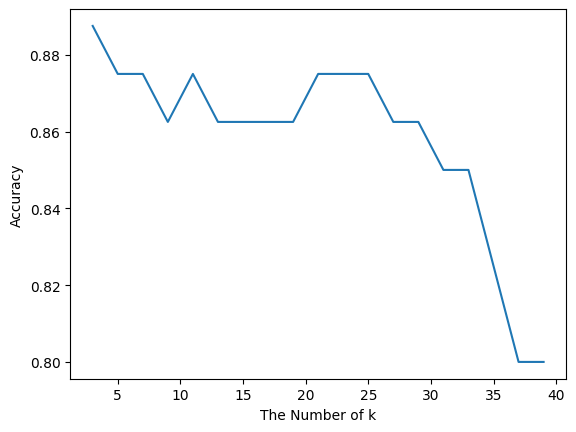

In [57]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('The Number of k')
plt.ylabel('Accuracy')
plt.show()

In [58]:
cvs = cross_validation_scores

k = k_list[cvs.index(max(cross_validation_scores))]

print('The Best Number of k : ' + str(k))
# The Best Number of k : 3

The Best Number of k : 3


In [59]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred
# array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
#        'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [60]:
comparison = pd.DataFrame(
  {
    'prediction': pred,
    'ground_truth': y_test.values.ravel()
  }
)

print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))
# accuracy : 1.0

accuracy : 1.0


In [61]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred
# array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
#        'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [62]:
comparison = pd.DataFrame(
  {
    'prediction': pred,
    'ground_truth': y_test.values.ravel()
  }
)

print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.95
